In [1]:
# Importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset
dataset = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
dataset.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [5]:
dataset.shape

(7043, 21)

In [6]:
#Finding missing values
dataset.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
dataset=dataset.replace(to_replace='?',value='0')
dataset=dataset.replace(to_replace=' ',value='0')
#Replacing missing values
#dataset['FamilySize'] = dataset['FamilySize'].fillna(dataset['FamilySize'].mean())

<Axes: xlabel='gender', ylabel='count'>

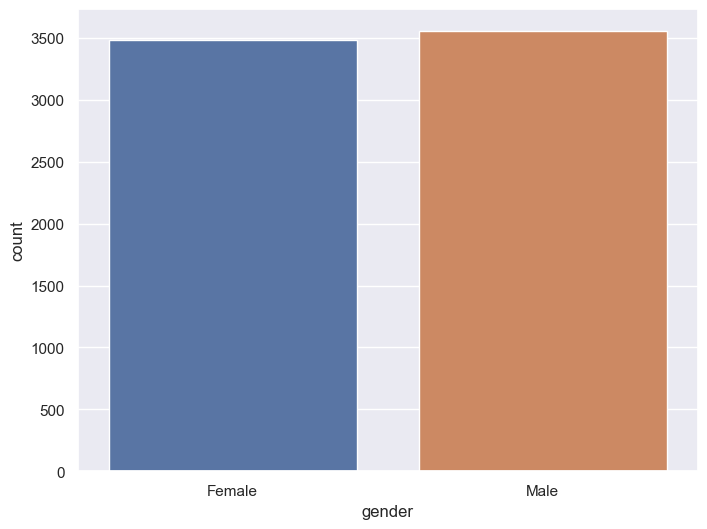

In [8]:
sns.set(rc = {"figure.figsize": (8, 6)})
sns.countplot(x="gender", data=dataset)

<Axes: xlabel='Partner', ylabel='count'>

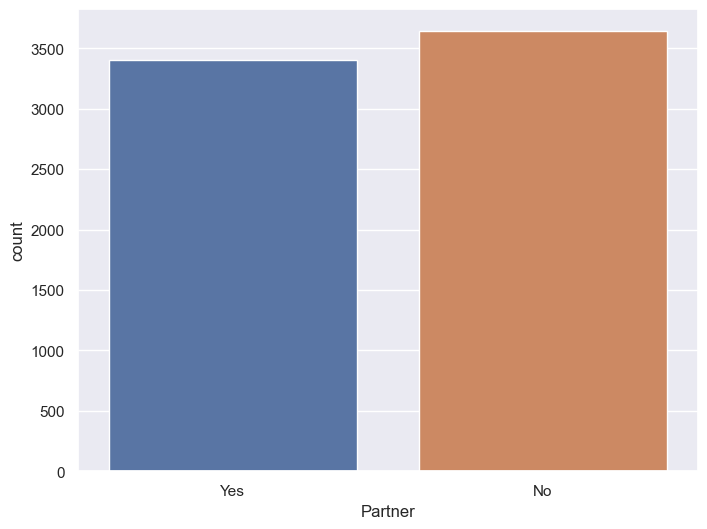

In [9]:
sns.set(rc = {"figure.figsize": (8, 6)})
sns.countplot(x="Partner", data=dataset)

<Axes: xlabel='Dependents', ylabel='count'>

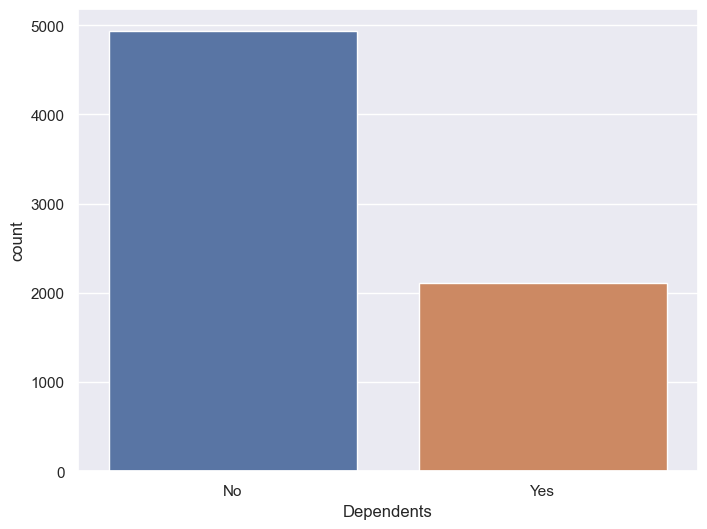

In [10]:
sns.set(rc = {"figure.figsize": (8, 6)})
sns.countplot(x="Dependents", data=dataset)

<Axes: xlabel='PhoneService', ylabel='count'>

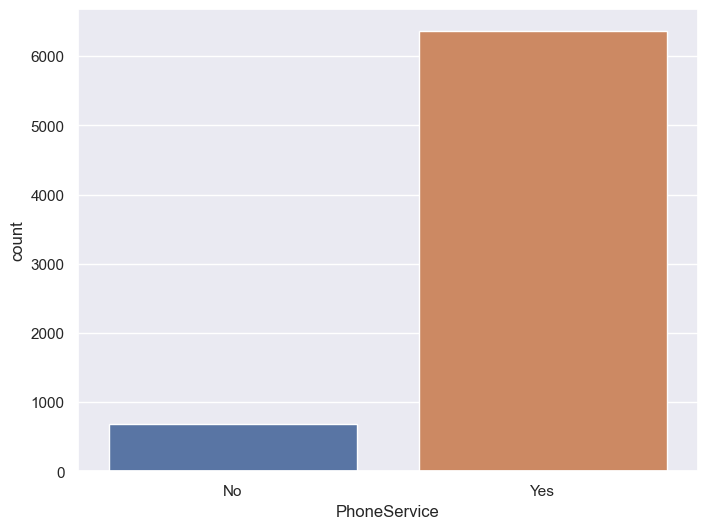

In [11]:
sns.set(rc = {"figure.figsize": (8, 6)})
sns.countplot(x="PhoneService", data=dataset)

<Axes: xlabel='MultipleLines', ylabel='count'>

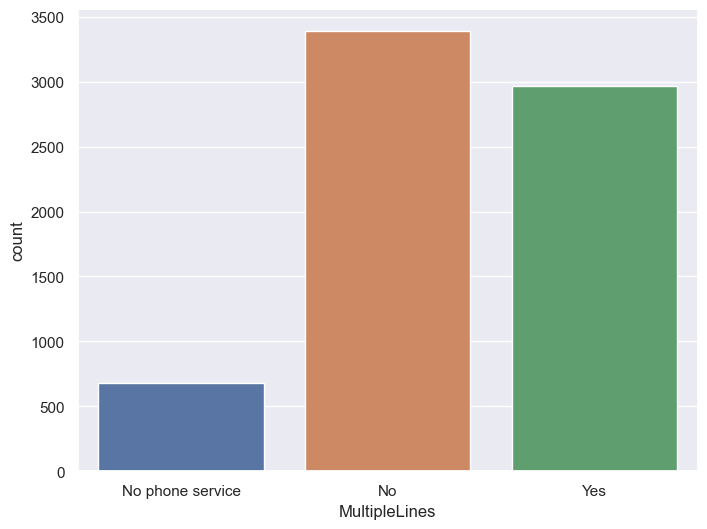

In [12]:
sns.set(rc = {"figure.figsize": (8, 6)})
sns.countplot(x="MultipleLines", data=dataset)

<Axes: xlabel='InternetService', ylabel='count'>

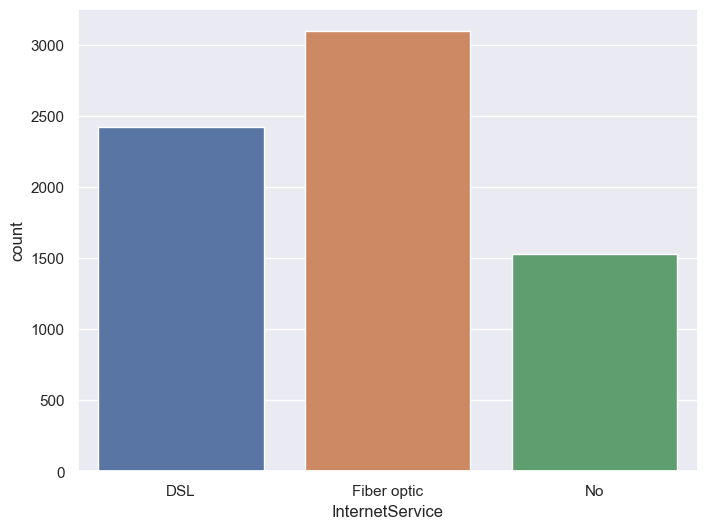

In [13]:
sns.set(rc = {"figure.figsize": (8, 6)})
sns.countplot(x="InternetService", data=dataset)

<Axes: xlabel='OnlineSecurity', ylabel='count'>

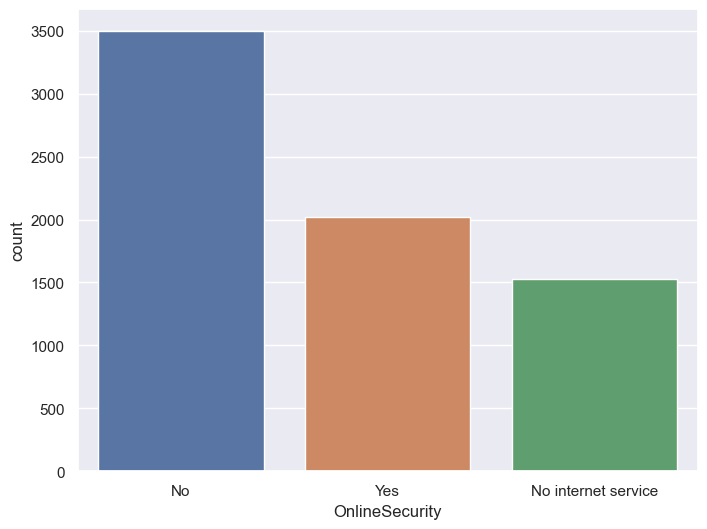

In [14]:
sns.set(rc = {"figure.figsize": (8, 6)})
sns.countplot(x="OnlineSecurity", data=dataset)

<Axes: xlabel='OnlineBackup', ylabel='count'>

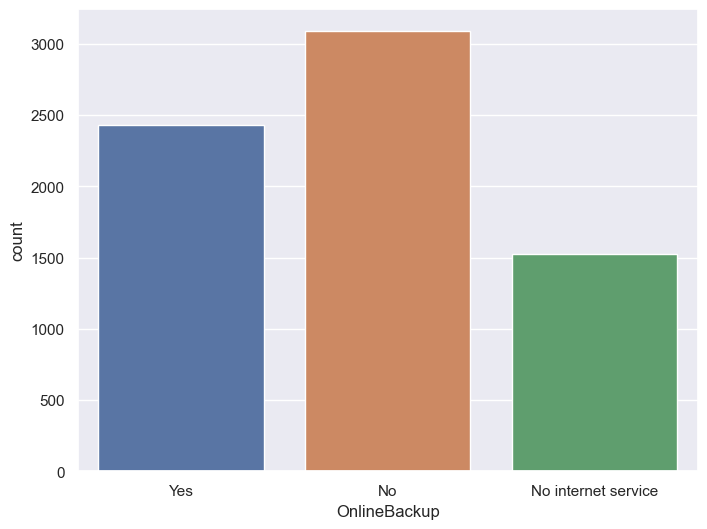

In [15]:
sns.set(rc = {"figure.figsize": (8, 6)})
sns.countplot(x="OnlineBackup", data=dataset)

<Axes: xlabel='DeviceProtection', ylabel='count'>

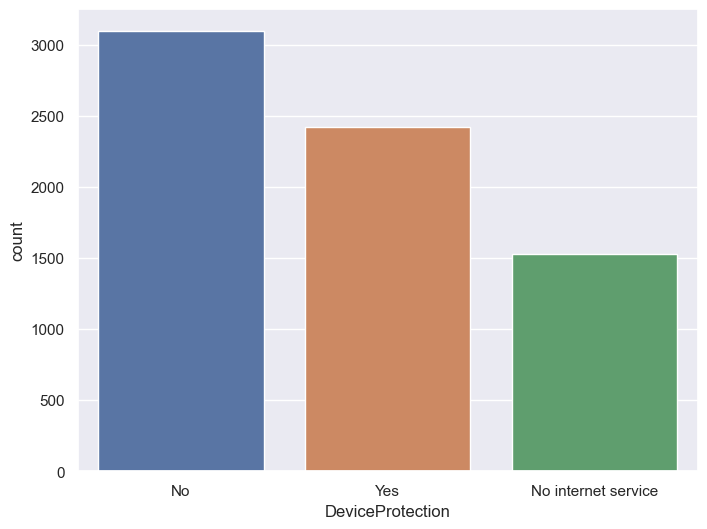

In [16]:
sns.set(rc = {"figure.figsize": (8, 6)})
sns.countplot(x="DeviceProtection", data=dataset)

<Axes: xlabel='TechSupport', ylabel='count'>

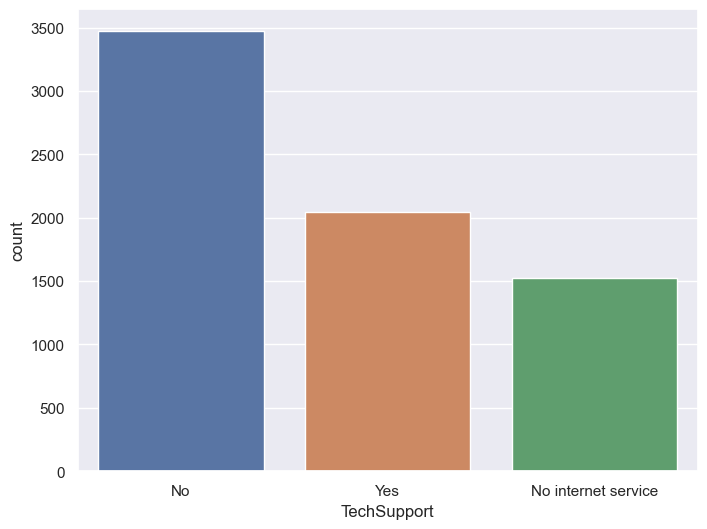

In [17]:
sns.set(rc = {"figure.figsize": (8, 6)})
sns.countplot(x="TechSupport", data=dataset)

<Axes: xlabel='StreamingTV', ylabel='count'>

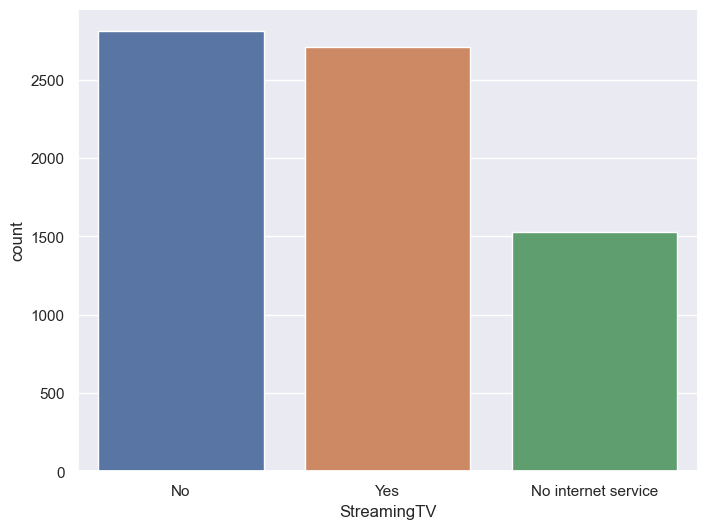

In [18]:
sns.set(rc = {"figure.figsize": (8, 6)})
sns.countplot(x="StreamingTV", data=dataset)

<Axes: xlabel='StreamingMovies', ylabel='count'>

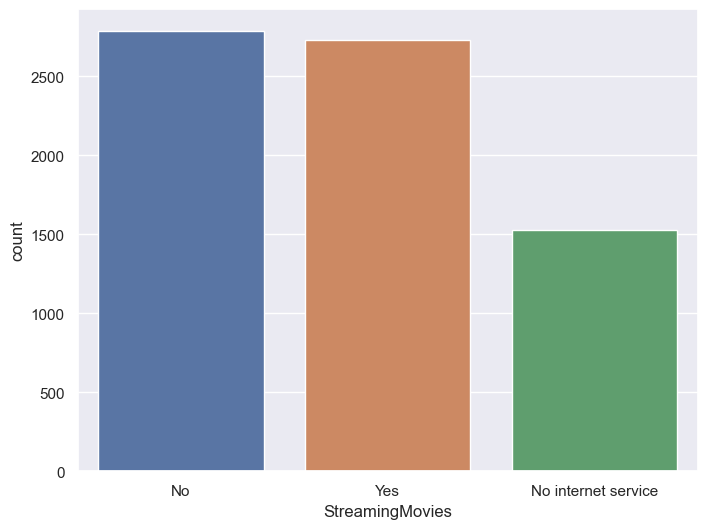

In [19]:
sns.set(rc = {"figure.figsize": (8, 6)})
sns.countplot(x="StreamingMovies", data=dataset)

<Axes: xlabel='Contract', ylabel='count'>

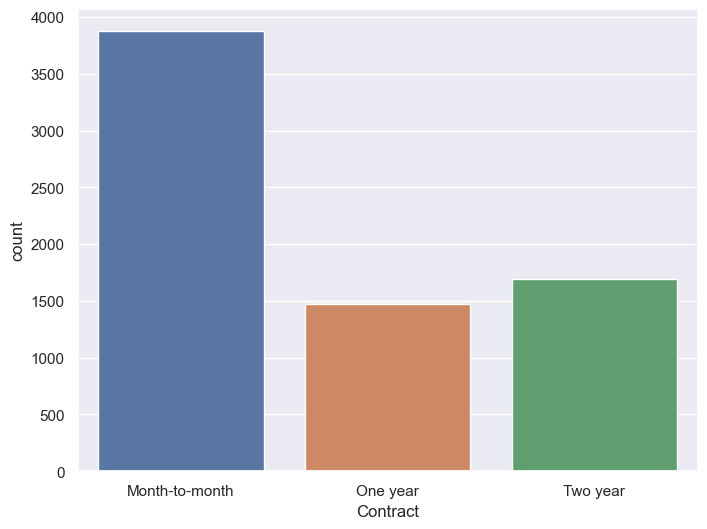

In [20]:
sns.set(rc = {"figure.figsize": (8, 6)})
sns.countplot(x="Contract", data=dataset)

<Axes: xlabel='PaperlessBilling', ylabel='count'>

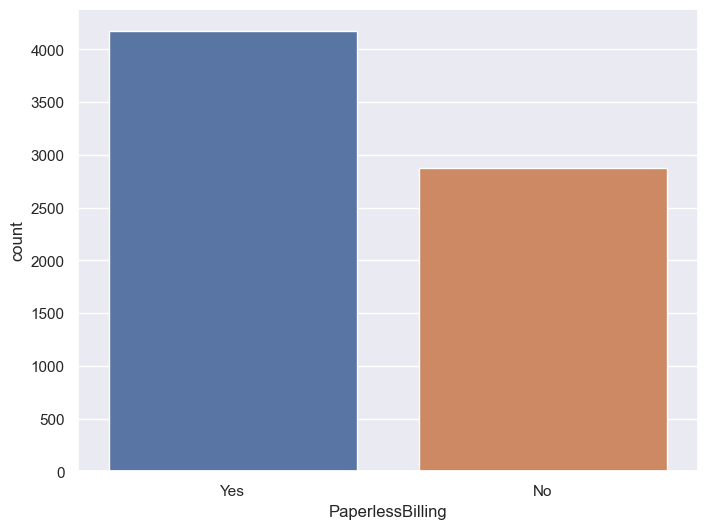

In [21]:
sns.set(rc = {"figure.figsize": (8, 6)})
sns.countplot(x="PaperlessBilling", data=dataset)

<Axes: xlabel='PaymentMethod', ylabel='count'>

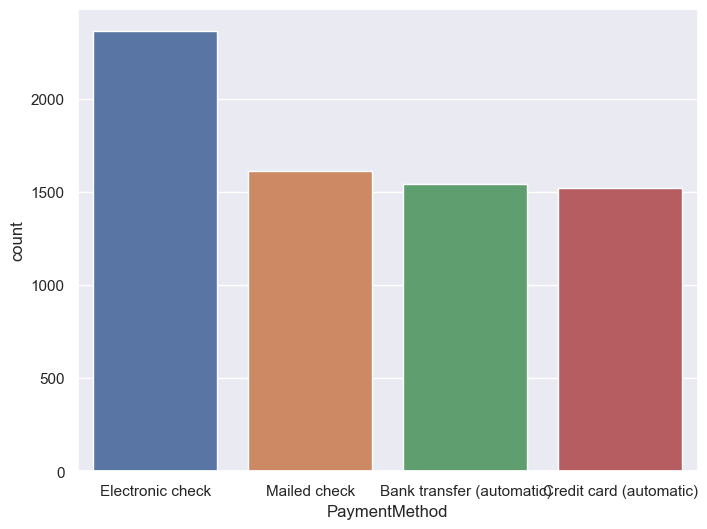

In [22]:
sns.set(rc = {"figure.figsize": (8, 6)})
sns.countplot(x="PaymentMethod", data=dataset)

<Axes: xlabel='Churn', ylabel='count'>

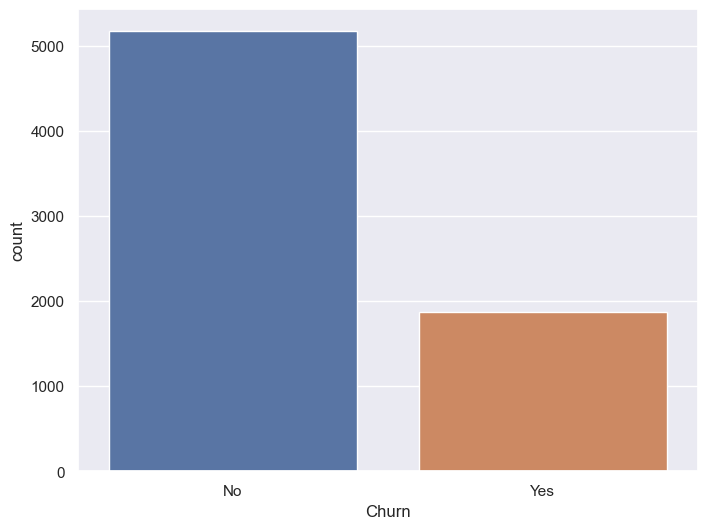

In [23]:
sns.set(rc = {"figure.figsize": (8, 6)})
sns.countplot(x="Churn", data=dataset)

In [24]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
dataset['gender']= labelencoder_X.fit_transform(dataset['gender'])
dataset['Partner']= labelencoder_X.fit_transform(dataset['Partner'])
dataset['Dependents']= labelencoder_X.fit_transform(dataset['Dependents'])
dataset['PhoneService']= labelencoder_X.fit_transform(dataset['PhoneService'])
dataset['MultipleLines']= labelencoder_X.fit_transform(dataset['MultipleLines'])
dataset['InternetService']= labelencoder_X.fit_transform(dataset['InternetService'])
dataset['OnlineSecurity']= labelencoder_X.fit_transform(dataset['OnlineSecurity'])
dataset['OnlineBackup']= labelencoder_X.fit_transform(dataset['OnlineBackup'])
dataset['DeviceProtection']= labelencoder_X.fit_transform(dataset['DeviceProtection'])
dataset['TechSupport']= labelencoder_X.fit_transform(dataset['TechSupport'])
dataset['StreamingTV']= labelencoder_X.fit_transform(dataset['StreamingTV'])
dataset['StreamingMovies']= labelencoder_X.fit_transform(dataset['StreamingMovies'])
dataset['Contract']= labelencoder_X.fit_transform(dataset['Contract'])
dataset['PaperlessBilling']= labelencoder_X.fit_transform(dataset['PaperlessBilling'])
dataset['PaymentMethod']= labelencoder_X.fit_transform(dataset['PaymentMethod'])
dataset['Churn']= labelencoder_X.fit_transform(dataset['Churn'])

In [25]:
X = dataset.drop('customerID', axis=1)
X = X.drop('Churn', axis=1)
y = dataset.Churn
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=1234,
                                                    stratify=dataset.Churn)

In [27]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5282, 19) (1761, 19) (5282,) (1761,)


In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.pipeline import Pipeline
model=RandomForestClassifier(n_estimators=40,oob_score=True)
#SMOTE-ENN
resample=SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))
#pipeline
pipeline=Pipeline(steps=[('r', resample), ('m', model)])

In [29]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('r',
                 SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))),
                ('m', RandomForestClassifier(n_estimators=40, oob_score=True))])

In [30]:
y_pred=pipeline.predict(X_test)

In [31]:
for i in range(0, len(y_pred)):
    i2=str(i)
    res=''
    if y_pred[i]==0:
        res='No Churn'
    elif y_pred[i]==1:
        res='Churn'
    print('Test data ',i2 , ' is ',res)

Test data  0  is  Churn
Test data  1  is  Churn
Test data  2  is  No Churn
Test data  3  is  No Churn
Test data  4  is  No Churn
Test data  5  is  No Churn
Test data  6  is  No Churn
Test data  7  is  No Churn
Test data  8  is  No Churn
Test data  9  is  No Churn
Test data  10  is  Churn
Test data  11  is  No Churn
Test data  12  is  No Churn
Test data  13  is  No Churn
Test data  14  is  No Churn
Test data  15  is  Churn
Test data  16  is  Churn
Test data  17  is  No Churn
Test data  18  is  No Churn
Test data  19  is  Churn
Test data  20  is  No Churn
Test data  21  is  Churn
Test data  22  is  No Churn
Test data  23  is  No Churn
Test data  24  is  No Churn
Test data  25  is  Churn
Test data  26  is  No Churn
Test data  27  is  Churn
Test data  28  is  No Churn
Test data  29  is  Churn
Test data  30  is  No Churn
Test data  31  is  No Churn
Test data  32  is  Churn
Test data  33  is  No Churn
Test data  34  is  Churn
Test data  35  is  No Churn
Test data  36  is  No Churn
Test data 

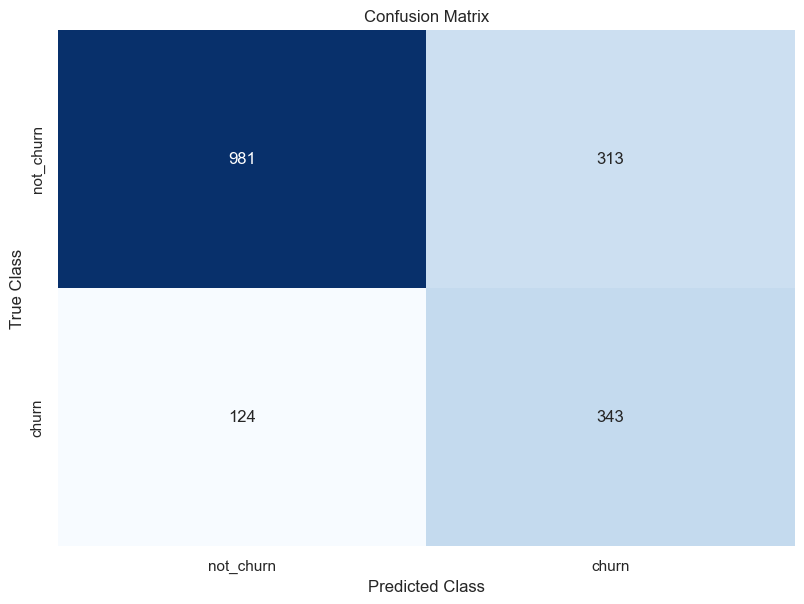

In [32]:
class_names = ['not_churn', 'churn']
matrix = confusion_matrix(y_test, y_pred)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [33]:
print("Accuracy for Random Forest : {}%".format(metrics.accuracy_score(y_test, y_pred)*100))

Accuracy for Random Forest : 75.18455423055083%


In [34]:
model=DecisionTreeClassifier(max_features = i, random_state = 0)
#SMOTE-ENN
resample=SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))
#pipeline
pipeline=Pipeline(steps=[('r', resample), ('m', model)])

In [35]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('r',
                 SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))),
                ('m',
                 DecisionTreeClassifier(max_features=1760, random_state=0))])

In [36]:
y_pred=pipeline.predict(X_test)

In [37]:
for i in range(0, len(y_pred)):
    i2=str(i)
    res=''
    if y_pred[i]==0:
        res='No Churn'
    elif y_pred[i]==1:
        res='Churn'
    print('Test data ',i2 , ' is ',res)

Test data  0  is  Churn
Test data  1  is  Churn
Test data  2  is  No Churn
Test data  3  is  No Churn
Test data  4  is  No Churn
Test data  5  is  No Churn
Test data  6  is  No Churn
Test data  7  is  Churn
Test data  8  is  No Churn
Test data  9  is  No Churn
Test data  10  is  No Churn
Test data  11  is  No Churn
Test data  12  is  No Churn
Test data  13  is  Churn
Test data  14  is  Churn
Test data  15  is  Churn
Test data  16  is  Churn
Test data  17  is  No Churn
Test data  18  is  No Churn
Test data  19  is  Churn
Test data  20  is  No Churn
Test data  21  is  Churn
Test data  22  is  No Churn
Test data  23  is  No Churn
Test data  24  is  No Churn
Test data  25  is  Churn
Test data  26  is  No Churn
Test data  27  is  Churn
Test data  28  is  No Churn
Test data  29  is  Churn
Test data  30  is  Churn
Test data  31  is  No Churn
Test data  32  is  Churn
Test data  33  is  No Churn
Test data  34  is  Churn
Test data  35  is  No Churn
Test data  36  is  No Churn
Test data  37  is  

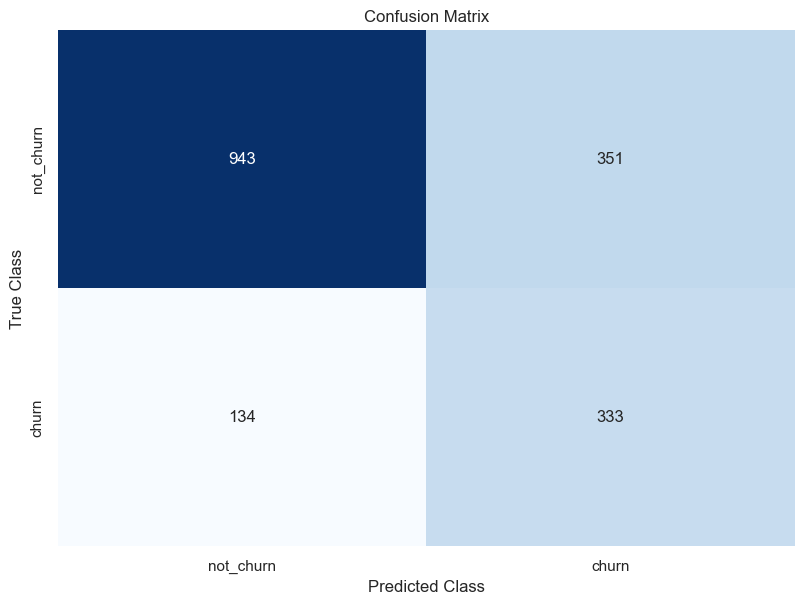

In [38]:
class_names = ['not_churn', 'churn']
matrix = confusion_matrix(y_test, y_pred)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [39]:
print("Accuracy for Decision Tree : {}%".format(metrics.accuracy_score(y_test, y_pred)*100))

Accuracy for Decision Tree : 72.45883021010789%


In [40]:
model=BaggingClassifier(n_estimators = 40, random_state = 22)
#SMOTE-ENN
resample=SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))
#pipeline
pipeline=Pipeline(steps=[('r', resample), ('m', model)])

In [41]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('r',
                 SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))),
                ('m', BaggingClassifier(n_estimators=40, random_state=22))])

In [42]:
y_pred=pipeline.predict(X_test)

In [43]:
for i in range(0, len(y_pred)):
    i2=str(i)
    res=''
    if y_pred[i]==0:
        res='No Churn'
    elif y_pred[i]==1:
        res='Churn'
    print('Test data ',i2 , ' is ',res)

Test data  0  is  Churn
Test data  1  is  Churn
Test data  2  is  No Churn
Test data  3  is  No Churn
Test data  4  is  No Churn
Test data  5  is  No Churn
Test data  6  is  No Churn
Test data  7  is  Churn
Test data  8  is  No Churn
Test data  9  is  No Churn
Test data  10  is  Churn
Test data  11  is  No Churn
Test data  12  is  No Churn
Test data  13  is  No Churn
Test data  14  is  No Churn
Test data  15  is  Churn
Test data  16  is  Churn
Test data  17  is  No Churn
Test data  18  is  No Churn
Test data  19  is  Churn
Test data  20  is  No Churn
Test data  21  is  Churn
Test data  22  is  No Churn
Test data  23  is  No Churn
Test data  24  is  No Churn
Test data  25  is  Churn
Test data  26  is  No Churn
Test data  27  is  No Churn
Test data  28  is  No Churn
Test data  29  is  Churn
Test data  30  is  No Churn
Test data  31  is  No Churn
Test data  32  is  Churn
Test data  33  is  No Churn
Test data  34  is  Churn
Test data  35  is  No Churn
Test data  36  is  No Churn
Test data 

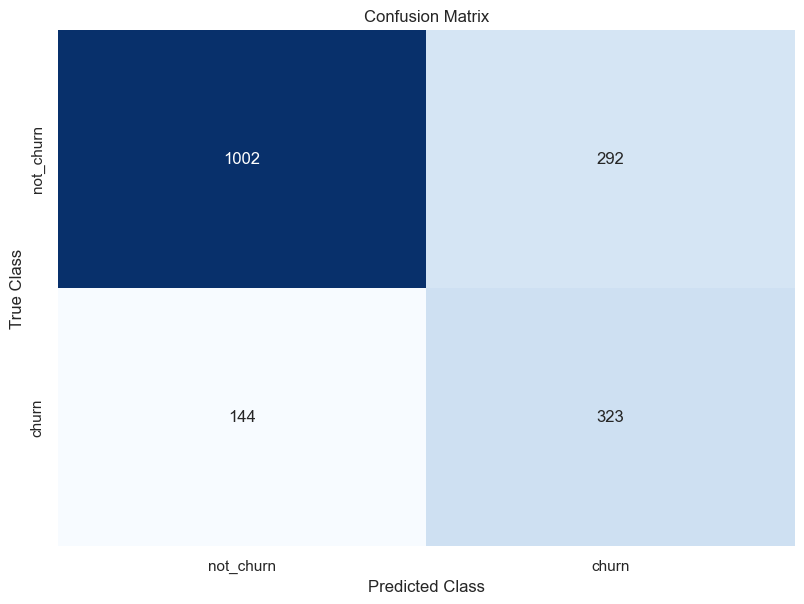

In [44]:
class_names = ['not_churn', 'churn']
matrix = confusion_matrix(y_test, y_pred)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [45]:
print("Accuracy for Bagged Tree : {}%".format(metrics.accuracy_score(y_test, y_pred)*100))

Accuracy for Bagged Tree : 75.24134014764338%


In [46]:
from sklearn.ensemble import VotingClassifier
rf=RandomForestClassifier(n_estimators=40,oob_score=True)
#rf=GradientBoostingClassifier(learning_rate=0.1)
clf = BaggingClassifier(n_estimators = 40, random_state = 22)
estimators = []
estimators.append(('clf', clf))
estimators.append(('rf', rf))
ensemble = VotingClassifier(estimators)
#SMOTE-ENN
resample=SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))
#pipeline
pipeline=Pipeline(steps=[('r', resample), ('m', ensemble)])

In [47]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('r',
                 SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))),
                ('m',
                 VotingClassifier(estimators=[('clf',
                                               BaggingClassifier(n_estimators=40,
                                                                 random_state=22)),
                                              ('rf',
                                               RandomForestClassifier(n_estimators=40,
                                                                      oob_score=True))]))])

In [48]:
y_pred=pipeline.predict(X_test)

In [49]:
for i in range(0, len(y_pred)):
    i2=str(i)
    res=''
    if y_pred[i]==0:
        res='No Churn'
    elif y_pred[i]==1:
        res='Churn'
    print('Test data ',i2 , ' is ',res)

Test data  0  is  Churn
Test data  1  is  Churn
Test data  2  is  No Churn
Test data  3  is  No Churn
Test data  4  is  No Churn
Test data  5  is  No Churn
Test data  6  is  No Churn
Test data  7  is  Churn
Test data  8  is  No Churn
Test data  9  is  No Churn
Test data  10  is  Churn
Test data  11  is  No Churn
Test data  12  is  No Churn
Test data  13  is  No Churn
Test data  14  is  No Churn
Test data  15  is  Churn
Test data  16  is  Churn
Test data  17  is  No Churn
Test data  18  is  No Churn
Test data  19  is  Churn
Test data  20  is  No Churn
Test data  21  is  Churn
Test data  22  is  No Churn
Test data  23  is  No Churn
Test data  24  is  No Churn
Test data  25  is  Churn
Test data  26  is  No Churn
Test data  27  is  No Churn
Test data  28  is  No Churn
Test data  29  is  Churn
Test data  30  is  No Churn
Test data  31  is  No Churn
Test data  32  is  Churn
Test data  33  is  No Churn
Test data  34  is  Churn
Test data  35  is  No Churn
Test data  36  is  No Churn
Test data 

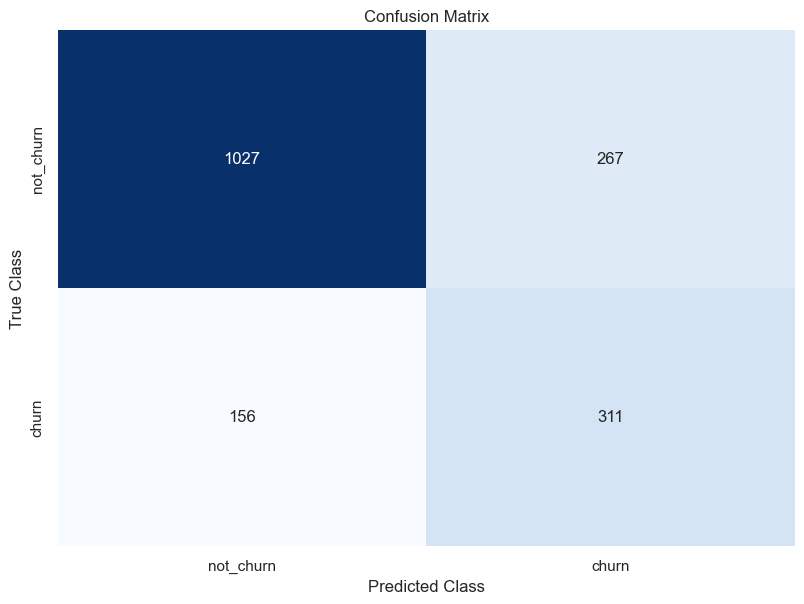

In [50]:
class_names = ['not_churn', 'churn']
matrix = confusion_matrix(y_test, y_pred)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [51]:
print("Accuracy for Voting classifier : {}%".format(metrics.accuracy_score(y_test, y_pred)*100))

Accuracy for Voting classifier : 75.97955706984668%
